# Install PyCaret (version 3.0-rc) and Shap



*   https://pycaret.gitbook.io/docs/
*   https://shap.readthedocs.io/en/latest/index.html

In [1]:
# get training data 
import pandas as pd
from shapely.geometry import Polygon, Point
import ast
import numpy as np


# ignoring polygon, box, boundingbox, p1 and p2 points
valid_cols = ["poly","url", "area", "circumference", "aspectRatio", "shapeFactor", "direction", "distance", "equivalentDiameter", "minorAxisLength", "majorAxisLength", "eccentricity", "convexArea", "solidity", "roundness", "uniqueness"]

df_train_i = pd.read_csv("./dataset_final/csvs_uniqueness/mask_polygons_images_trainset_i_512x_u.csv",
    usecols = valid_cols,
    delimiter=";",
    decimal="."
)

df_train_ii = pd.read_csv(
    "./dataset_final/csvs_uniqueness/mask_polygons_images_trainset_ii_512x_u.csv",
    usecols = valid_cols,
    delimiter=";",
    decimal="."
)

df_train_iii = pd.read_csv(
    "./dataset_final/csvs_uniqueness/mask_polygons_images_trainset_iii_512x_u.csv",
    usecols = valid_cols,
    delimiter=";",
    decimal="."
)

df_train = pd.concat([df_train_i, df_train_ii, df_train_iii])
df_train.head()

,url,poly,area,circumference,aspectRatio,shapeFactor,direction,distance,equivalentDiameter,minorAxisLength,majorAxisLength,eccentricity,convexArea,solidity,roundness,uniqueness
0,Auswahl_CFB1010_400-H-12mm-4000x15_4_2.png,[[298. 1.]\n [306. 1.]\n [306. 2.]\n [31...,0.299383,3.027778,1.550000,1.561010,90.000000,0.013889,44.452984,40.000000,62.000000,0.645161,1838.0,0.844396,0.668134,0.643698
1,Auswahl_CFB1010_400-H-12mm-4000x15_4_2.png,[[ 1. 46.]\n [ 3. 46.]\n [ 3. 47.]\n [ 6. 47.]...,0.027392,1.027778,2.910112,1.751792,66.037511,0.166667,13.446190,9.036581,26.297466,0.343629,169.5,0.837758,0.510433,0.728307
2,Auswahl_CFB1010_400-H-12mm-4000x15_4_2.png,[[208. 0.]\n [214. 0.]\n [214. 1.]\n [21...,0.226852,3.638889,4.269231,2.155225,33.690068,0.700667,38.695345,21.633308,92.357583,0.234234,1602.5,0.733853,0.368115,0.542355
3,Auswahl_CFB1010_400-H-12mm-4000x15_4_2.png,[[15. 72.]\n [33. 72.]\n [33. 73.]\n [35. 73.]...,0.044946,1.333333,2.752412,1.774142,83.418055,0.166667,17.223960,11.882699,32.706079,0.363318,319.5,0.729264,0.483376,0.650515
4,Auswahl_CFB1010_400-H-12mm-4000x15_4_2.png,[[ 72. 29.]\n [ 72. 34.]\n [ 73. 34.]\n [ 7...,0.101273,2.805556,6.110553,2.486948,28.886582,0.227795,25.854415,12.016549,73.427756,0.163651,686.5,0.764749,0.283188,0.599828


In [2]:
#get PCs from 2pt stats

df_pca_i = pd.read_csv("./dataset_final/csvs_2pt_Marc_code/pca_2point_trainset_i_512x.csv",
    usecols = ["url","pc1","MA%","pc2"],
    delimiter=",",
    decimal="."
)
df_pca_i["CIV"] = "high"

df_pca_ii = pd.read_csv(
    "./dataset_final/csvs_2pt_Marc_code/pca_2point_trainset_ii_512x.csv",
    usecols = ["url","pc1","MA%","pc2"],
    delimiter=",",
    decimal="."
)
df_pca_ii["CIV"] = "medium"
df_pca_iii = pd.read_csv(
    "./dataset_final/csvs_2pt_Marc_code/pca_2point_trainset_iii_512x.csv",
    usecols = ["url","pc1","MA%","pc2"],
    delimiter=",",
    decimal="."
)
df_pca_iii["CIV"] = "low"

df_pca = pd.concat([df_pca_i,df_pca_ii,df_pca_iii])
df_pca

,pc1,pc2,url,MA%,CIV
0,-0.758834,0.069338,Auswahl_CFB1010_400-H-12mm-4000x14_1_1.png,0.144493,high
1,0.862654,-0.601782,Auswahl_CFB1010_400-H-12mm-4000x14_1_2.png,0.171535,high
2,-2.479500,-0.347174,Auswahl_CFB1010_400-H-12mm-4000x14_1_3.png,0.142311,high
3,3.926288,0.066862,Auswahl_CFB1010_400-H-12mm-4000x14_2_1.png,0.225552,high
4,3.308371,-0.615074,Auswahl_CFB1010_400-H-12mm-4000x14_2_2.png,0.208122,high
...,...,...,...,...,...
211,4.078592,-0.062912,Auswahl_CFB1010-500-03-V-9mm-4000x12_3_2.png,0.227390,low
212,3.565618,-1.223996,Auswahl_CFB1010-500-03-V-9mm-4000x12_3_3.png,0.215294,low
213,-2.306440,-1.809752,Auswahl_CFB1010-500-03-V-9mm-4000x12_4_1.png,0.311413,low
214,1.159975,-0.522733,Auswahl_CFB1010-500-03-V-9mm-4000x12_4_2.png,0.273258,low


array([[<AxesSubplot:title={'center':'MA%'}>]], dtype=object)

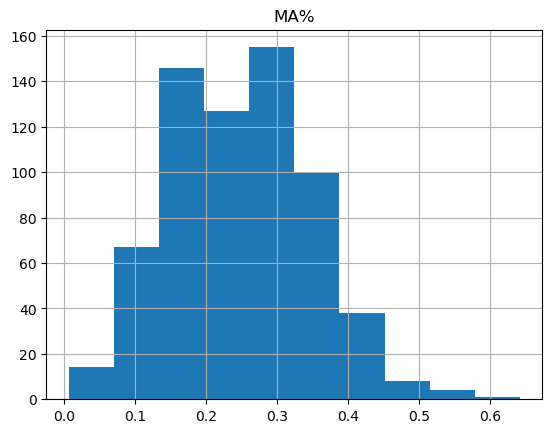

In [3]:
#plot histogram
df_pca.hist('MA%')

# Group dataframe contents based on url and create mean and std columns for all features

In [5]:
#group M-A instances which belong to the same image by the mean and standard deviation using the image URL

df_train_grouped = df_train.groupby("url").agg([np.mean, np.std])
df_train_grouped.columns = df_train_grouped.columns.map("_".join)
df_train_grouped = df_train_grouped.reset_index()
df_train_grouped.head(-1)

C:\Users\mackerm\AppData\Local\Temp\ipykernel_20460\67642919.py:3: FutureWarning: ['poly'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_train_grouped = df_train.groupby("url").agg([np.mean, np.std])


,url,area_mean,area_std,circumference_mean,circumference_std,aspectRatio_mean,aspectRatio_std,shapeFactor_mean,shapeFactor_std,direction_mean,...,eccentricity_mean,eccentricity_std,convexArea_mean,convexArea_std,solidity_mean,solidity_std,roundness_mean,roundness_std,uniqueness_mean,uniqueness_std
0,Auswahl_CFB1010-500-03-H-12mm-4000x17_1_1.png,1.325617,2.531987,7.077160,9.743229,2.180051,0.864322,1.937952,0.597817,65.153613,...,0.523983,0.194700,13246.333333,28331.797203,0.756204,0.179524,0.541353,0.165316,0.651774,0.132318
1,Auswahl_CFB1010-500-03-H-12mm-4000x17_1_2.png,0.908681,2.659383,4.537037,8.442066,1.827620,0.504132,1.629368,0.430998,70.722711,...,0.586277,0.163443,9705.400000,32479.869600,0.873436,0.132311,0.665722,0.138070,0.623556,0.131450
2,Auswahl_CFB1010-500-03-H-12mm-4000x17_1_3.png,1.062076,2.112810,5.114815,5.572809,2.311942,1.107987,1.824171,0.367988,62.563583,...,0.526410,0.227918,7403.266667,14177.402094,0.773494,0.128318,0.552480,0.183757,0.645595,0.131969
3,Auswahl_CFB1010-500-03-H-12mm-4000x17_2_1.png,1.926803,5.298359,6.000000,8.069834,2.046666,0.842026,1.894574,0.480474,84.058683,...,0.557912,0.193457,12436.045455,31883.385434,0.770800,0.140167,0.549156,0.164323,0.664069,0.145366
4,Auswahl_CFB1010-500-03-H-12mm-4000x17_2_2.png,5.348026,12.280941,8.365741,12.555266,2.232668,1.329638,1.744641,0.399911,30.000000,...,0.573682,0.288774,36542.333333,84043.373116,0.804342,0.089140,0.565172,0.238214,0.696543,0.093133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Auswahl_CFB1010_500-V-9mm-4000x12_3_1.png,1.058733,2.092160,6.065359,8.471954,2.440300,1.148988,1.856848,0.533968,60.746088,...,0.500469,0.227930,9317.764706,21736.950739,0.821168,0.125826,0.566903,0.168605,0.591216,0.128325
655,Auswahl_CFB1010_500-V-9mm-4000x12_3_2.png,0.764559,1.236523,5.394737,4.829665,3.032049,2.360599,1.966740,0.480452,82.630068,...,0.425740,0.163040,5946.157895,9453.310899,0.780677,0.141122,0.479352,0.142494,0.623417,0.118703
656,Auswahl_CFB1010_500-V-9mm-4000x12_3_3.png,0.528190,0.737721,4.770202,3.949027,3.061330,1.291513,1.985662,0.408422,97.551530,...,0.398863,0.198006,4232.750000,7077.398684,0.770106,0.134566,0.464334,0.154996,0.660656,0.149204
657,Auswahl_CFB1010_500-V-9mm-4000x12_4_1.png,0.803683,1.685160,5.017974,5.092025,3.247329,1.794217,1.933007,0.403920,88.778383,...,0.381788,0.175744,6234.088235,14032.878916,0.788807,0.108929,0.484894,0.144609,0.591561,0.100572


In [6]:
#add pc1, pc2 and MA% as additional columns to the training set

df_trainset = df_train_grouped.merge(df_pca, left_on='url', right_on='url')

In [7]:
df_trainset.head(-1)

,url,area_mean,area_std,circumference_mean,circumference_std,aspectRatio_mean,aspectRatio_std,shapeFactor_mean,shapeFactor_std,direction_mean,...,solidity_mean,solidity_std,roundness_mean,roundness_std,uniqueness_mean,uniqueness_std,pc1,pc2,MA%,CIV
0,Auswahl_CFB1010-500-03-H-12mm-4000x17_1_1.png,1.325617,2.531987,7.077160,9.743229,2.180051,0.864322,1.937952,0.597817,65.153613,...,0.756204,0.179524,0.541353,0.165316,0.651774,0.132318,3.504097,0.269398,0.244640,low
1,Auswahl_CFB1010-500-03-H-12mm-4000x17_1_2.png,0.908681,2.659383,4.537037,8.442066,1.827620,0.504132,1.629368,0.430998,70.722711,...,0.873436,0.132311,0.665722,0.138070,0.623556,0.131450,1.538217,0.105163,0.278835,low
2,Auswahl_CFB1010-500-03-H-12mm-4000x17_1_3.png,1.062076,2.112810,5.114815,5.572809,2.311942,1.107987,1.824171,0.367988,62.563583,...,0.773494,0.128318,0.552480,0.183757,0.645595,0.131969,-1.128142,0.077936,0.325638,low
3,Auswahl_CFB1010-500-03-H-12mm-4000x17_2_1.png,1.926803,5.298359,6.000000,8.069834,2.046666,0.842026,1.894574,0.480474,84.058683,...,0.770800,0.140167,0.549156,0.164323,0.664069,0.145366,-5.707103,0.898454,0.427727,low
4,Auswahl_CFB1010-500-03-H-12mm-4000x17_2_2.png,5.348026,12.280941,8.365741,12.555266,2.232668,1.329638,1.744641,0.399911,30.000000,...,0.804342,0.089140,0.565172,0.238214,0.696543,0.093133,-15.949629,2.142011,0.641369,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Auswahl_CFB1010_500-V-9mm-4000x12_3_1.png,1.058733,2.092160,6.065359,8.471954,2.440300,1.148988,1.856848,0.533968,60.746088,...,0.821168,0.125826,0.566903,0.168605,0.591216,0.128325,-6.165520,0.772161,0.370037,medium
655,Auswahl_CFB1010_500-V-9mm-4000x12_3_2.png,0.764559,1.236523,5.394737,4.829665,3.032049,2.360599,1.966740,0.480452,82.630068,...,0.780677,0.141122,0.479352,0.142494,0.623417,0.118703,-2.784002,-0.549326,0.301197,medium
656,Auswahl_CFB1010_500-V-9mm-4000x12_3_3.png,0.528190,0.737721,4.770202,3.949027,3.061330,1.291513,1.985662,0.408422,97.551530,...,0.770106,0.134566,0.464334,0.154996,0.660656,0.149204,0.203053,-1.471251,0.244289,medium
657,Auswahl_CFB1010_500-V-9mm-4000x12_4_1.png,0.803683,1.685160,5.017974,5.092025,3.247329,1.794217,1.933007,0.403920,88.778383,...,0.788807,0.108929,0.484894,0.144609,0.591561,0.100572,-0.470376,0.213882,0.281963,medium


In [6]:
#get some statistics on MA%

df_trainset["MA%"].describe()

count    660.000000
mean       0.248862
std        0.098011
min        0.006805
25%        0.172385
50%        0.247639
75%        0.318569
max        0.641369
Name: MA%, dtype: float64

In [14]:
#check for class balance

df_trainset['CIV'].value_counts()

medium    228
low       216
high      216
Name: CIV, dtype: int64

In [21]:
#get all column names

set(df_trainset.columns)-set(get_config('X_train').columns)

{'CIV',
 'MA%',
 'area_mean',
 'area_std',
 'aspectRatio_mean',
 'aspectRatio_std',
 'circumference_mean',
 'circumference_std',
 'convexArea_mean',
 'convexArea_std',
 'direction_mean',
 'direction_std',
 'distance_mean',
 'distance_std',
 'eccentricity_mean',
 'eccentricity_std',
 'equivalentDiameter_std',
 'majorAxisLength_mean',
 'majorAxisLength_std',
 'minorAxisLength_mean',
 'minorAxisLength_std',
 'roundness_std',
 'shapeFactor_mean',
 'shapeFactor_std',
 'solidity_std',
 'uniqueness_std',
 'url'}

# Create classification labels based on "CIV_mean"

## Classification docs:
https://pycaret.gitbook.io/docs/get-started/quickstart#classification


https://pycaret.readthedocs.io/en/latest/api/classification.html

In [56]:
# set the classification workflow in pycaret

import jinja2
from pycaret.classification import *

classification = setup(
    data=df_trainset, 
    fold_shuffle=True,
    target='CIV',
    ignore_features=["url"],
    session_id=171,
    train_size=0.8,
    #fix_imbalance=True,
    remove_outliers=True,
    feature_selection=True,
    n_features_to_select=6,
    remove_multicollinearity=True,
    multicollinearity_threshold=0.9,
    normalize=True,
    #normalize_method="minmax",
    use_gpu=True,
    #pca=False,
    #pca_components=3
  )

,Description,Value
0,Session id,171
1,Target,CIV
2,Target type,Multiclass
3,Target mapping,"high: 0, low: 1, medium: 2"
4,Original data shape,"(660, 32)"
5,Transformed data shape,"(633, 7)"
6,Transformed train set shape,"(501, 7)"
7,Transformed test set shape,"(132, 7)"
8,Ignore features,1
9,Numeric features,31


In [10]:
#get all args for the setup function 
import inspect
inspect.getfullargspec(setup)

FullArgSpec(args=['data', 'data_func', 'target', 'index', 'train_size', 'test_data', 'ordinal_features', 'numeric_features', 'categorical_features', 'date_features', 'text_features', 'ignore_features', 'keep_features', 'preprocess', 'create_date_columns', 'imputation_type', 'numeric_imputation', 'categorical_imputation', 'iterative_imputation_iters', 'numeric_iterative_imputer', 'categorical_iterative_imputer', 'text_features_method', 'max_encoding_ohe', 'encoding_method', 'rare_to_value', 'rare_value', 'polynomial_features', 'polynomial_degree', 'low_variance_threshold', 'group_features', 'group_names', 'remove_multicollinearity', 'multicollinearity_threshold', 'bin_numeric_features', 'remove_outliers', 'outliers_method', 'outliers_threshold', 'fix_imbalance', 'fix_imbalance_method', 'transformation', 'transformation_method', 'normalize', 'normalize_method', 'pca', 'pca_method', 'pca_components', 'feature_selection', 'feature_selection_method', 'feature_selection_estimator', 'n_featur

In [9]:
#train models

best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9924,0.9995,0.9924,0.9930,0.9924,0.9886,0.9889,0.4230
lr,Logistic Regression,0.9279,0.9687,0.9279,0.9327,0.9272,0.8919,0.8949,2.7200
lightgbm,Light Gradient Boosting Machine,0.8406,0.9594,0.8406,0.8442,0.8395,0.7610,0.7638,3.4920
svm,SVM - Linear Kernel,0.8371,0.0000,0.8371,0.8494,0.8338,0.7555,0.7637,0.3280
gbc,Gradient Boosting Classifier,0.8199,0.9409,0.8199,0.8241,0.8182,0.7299,0.7335,1.2850
et,Extra Trees Classifier,0.8199,0.9391,0.8199,0.8261,0.8179,0.7299,0.7345,0.7670
rf,Random Forest Classifier,0.7781,0.9251,0.7781,0.7803,0.7731,0.6670,0.6725,0.7660
knn,K Neighbors Classifier,0.7727,0.8936,0.7727,0.7732,0.7678,0.6588,0.6635,0.6730
dt,Decision Tree Classifier,0.7537,0.8143,0.7537,0.7571,0.7512,0.6301,0.6339,0.4060
lda,Linear Discriminant Analysis,0.7309,0.9005,0.7309,0.7395,0.7305,0.5959,0.6003,0.4090


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [11]:
#train a logistic regression model

lr = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9245,0.9659,0.9245,0.9319,0.9249,0.8869,0.8903
1,0.9811,0.9857,0.9811,0.9822,0.9811,0.9717,0.9722
2,0.9623,0.9765,0.9623,0.9633,0.9622,0.9434,0.9439
3,0.8491,0.9442,0.8491,0.8516,0.8485,0.7733,0.7749
4,0.9811,0.9840,0.9811,0.9821,0.9811,0.9717,0.9722
5,0.8679,0.9338,0.8679,0.8812,0.8630,0.8018,0.8127
6,0.9434,0.9885,0.9434,0.9434,0.9429,0.9151,0.9156
7,0.9623,0.9853,0.9623,0.9633,0.9623,0.9434,0.9439
8,0.8846,0.9452,0.8846,0.8993,0.8839,0.8272,0.8347


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [12]:
#train a quadratic distriminant analysis model

qda = create_model("qda")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9623,1.0000,0.9623,0.9660,0.9621,0.9434,0.9454
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9811,0.9963,0.9811,0.9821,0.9811,0.9717,0.9722
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9808,0.9989,0.9808,0.9818,0.9807,0.9711,0.9717


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
#train a light gradient boosting machine

lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7925,0.9499,0.7925,0.8074,0.7928,0.6894,0.6965
1,0.8491,0.9691,0.8491,0.8526,0.8495,0.7737,0.7750
2,0.9623,0.9952,0.9623,0.9633,0.9622,0.9434,0.9439
3,0.8113,0.9500,0.8113,0.8094,0.8088,0.7169,0.7184
4,0.8302,0.9488,0.8302,0.8352,0.8314,0.7451,0.7463
5,0.9245,0.9742,0.9245,0.9291,0.9254,0.8867,0.8881
6,0.9057,0.9795,0.9057,0.9081,0.9033,0.8580,0.8612
7,0.7925,0.9397,0.7925,0.7864,0.7876,0.6882,0.6897
8,0.7692,0.9420,0.7692,0.7643,0.7637,0.6543,0.6568


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
#tune the LR model
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9245,0.9701,0.9245,0.9319,0.9249,0.8869,0.8903
1,0.9811,0.9830,0.9811,0.9822,0.9811,0.9717,0.9722
2,0.9811,0.9771,0.9811,0.9822,0.9811,0.9717,0.9722
3,0.8491,0.9378,0.8491,0.8516,0.8485,0.7733,0.7749
4,0.9811,0.9830,0.9811,0.9821,0.9811,0.9717,0.9722
5,0.8868,0.9392,0.8868,0.8951,0.8835,0.8301,0.8373
6,0.9434,0.9879,0.9434,0.9434,0.9429,0.9151,0.9156
7,0.9623,0.9864,0.9623,0.9633,0.9623,0.9434,0.9439
8,0.9038,0.9475,0.9038,0.9173,0.9044,0.8560,0.8622


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
#tuned_lightgbm = tune_model(lightgbm)

In [ ]:
#tuned_qda = tune_model(qda)

In [16]:
#evaluate model

evaluate_model(qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#save model, e.g. LGBM

from pycaret.nlp import load_model

save_model(lightgbm, './saved_models/lightgbm')

In [ ]:
#load saved model
loaded_model = load_model('./saved_models/tuned_lr')
print(loaded_model)

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

In [23]:
# only for decision boundary plot, set features for X and Y axis

xlabel = 'pc2'
ylabel = 'MA%'
X_train = get_config('X_train')[[xlabel,ylabel]]
y_train = get_config('y_train')
X_test = get_config('X_test')[[xlabel,ylabel]]
y_test = get_config('y_test')

In [57]:
# get remaining features after feature selection

get_config('X_train')

,equivalentDiameter_mean,majorAxisLength_std,solidity_mean,pc1,pc2,MA%
0,-0.547275,-0.311000,-1.429719,0.299531,0.123963,-0.819323
1,0.775533,0.225243,1.620811,-1.461180,0.823205,1.928380
2,0.403329,0.343060,1.516892,-0.050358,0.101982,0.400545
3,-0.695579,-0.314591,1.095703,1.086631,-0.565642,-0.278553
4,-1.201727,-1.046037,-0.470370,0.501458,0.135292,-0.868035
...,...,...,...,...,...,...
522,-0.600652,-0.487361,1.082691,0.305061,-1.009555,-0.026731
523,1.806568,0.262170,0.698382,-2.520638,-0.895009,2.035853
524,-0.585799,0.132226,0.257564,0.923342,-0.628405,-0.450933
526,1.774637,-0.828788,0.313283,0.861962,0.970116,-0.116513


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

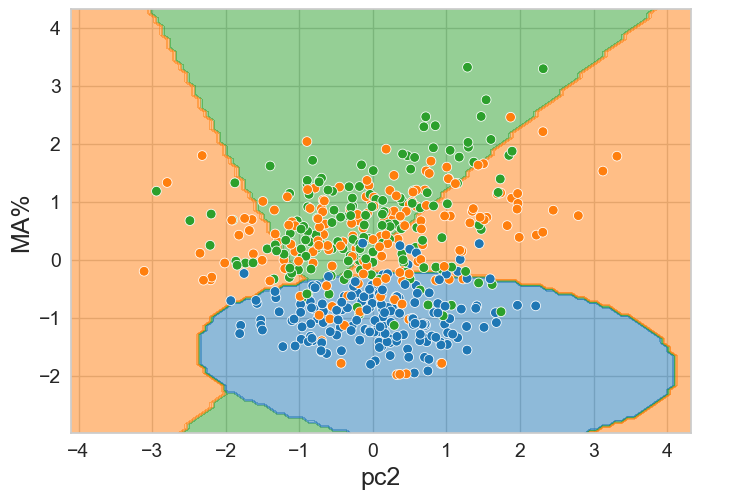

In [26]:
#plot decision boundaries, requires newest pycaret version

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import DecisionBoundaryDisplay

#classifier = qda.fit(np.array(X_train), np.array(y_train))

palette = ["tab:blue", "tab:green", "tab:orange"]
DecisionBoundaryDisplay.from_estimator(
    qda, np.array(X_train), 
    response_method="predict", cmap=ListedColormap(palette[:len(np.unique(y_train))]), alpha=0.5
)
ax = sns.scatterplot(data=np.array(X_train), x=X_train.iloc[:,0], y=X_train.iloc[:,1],
                     hue=y_train, palette=palette, legend=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel(xlabel, fontsize=18)
plt.ylabel(ylabel, fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#_ = plt.title("Decision boundary using a decision tree")

# Understanding feature importance using SHAP

Calculate SHAP values for interpretable model output after [coryroyce](https://github.com/coryroyce)

In [66]:
import shap

X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

In [67]:
#select an explainer function using the train set for e.g. lightgbm model

explainer = shap.explainers.Permutation(lightgbm.predict_proba, masker=X_train,data = X_train, link = shap.links.identity)

#explainer = shap.explainers.Exact(qda,X_test.head(50))
#explainer = shap.LinearExplainer(lr, masker=X_test,data = X_test.head(50), link = shap.links.identity)
#explainer = shap.Explainer(cat, algorithm= "auto", link = shap.links.identity)

In [68]:
# Set the index of the specific example to explain
X_idx = 4

shap_value_single = explainer(X_test.iloc[X_idx:X_idx+1,:])

In [69]:
#select the class of interest for the SHAP analysis

from ipywidgets import IntProgress,widgets

# Create the list of all labels for the drop down list
list_of_labels = ['high','low','medium']

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels,
                              value=0,
                              description='Select Label:'
                              )

# Display the dropdown list (Note: access index value with 'current_label.value')
current_label


Dropdown(description='Select Label:', options=(('high', 0), ('low', 1), ('medium', 2)), value=0)

In [70]:
#For limiting to the first 50 training examples for faster calculation use the out-commented line

#shap_values = explainer.shap_values(X = X_test.iloc[0:50,:])
shap_values = explainer(X_train)

Permutation explainer: 502it [04:57,  1.63it/s]                                                                        


In [77]:
#get a local analysis on the features, e.g. for row number 284 of a specific class

shap.initjs()

print(f'Current label Shown: {list_of_labels[current_label.value]}')

shap.force_plot(base_value = shap_values.base_values[0][current_label.value],
                shap_values = shap_values.values[284,:,current_label.value], 
                features = X_train.iloc[284,:]
                )

Current label Shown: high


In [78]:
#plot all rows and order them, e.g. after feature similarity for a specific class

shap.initjs()

print(f'Current label Shown: {list_of_labels[current_label.value]}')

shap.force_plot(base_value = shap_values.base_values[0][current_label.value],
                shap_values = shap_values.values[:,:,current_label.value], 
                features = X_train.iloc[:,:]
                )

Current label Shown: high


Current Label Shown: high



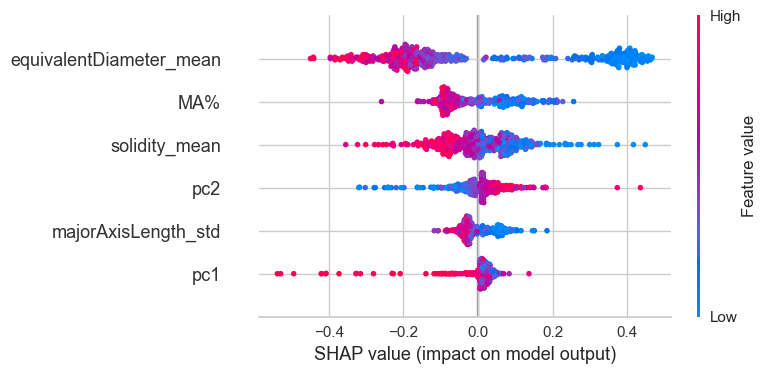

In [79]:
#get the global feature importance on a specific class

shap.initjs()

print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.summary_plot(shap_values = shap_values[:,:,current_label.value],
                  features = X_train.iloc[:,:]
                  ) 


In [87]:
# find out the classes of certain rows

df_trainset.loc[[246,546,293,568,30]][["url", "CIV"]]

,url,CIV
246,Auswahl_CFB1010_400-H-15mm-4000x18_3_1.png,high
546,Auswahl_CFB1010_500-H-9mm-4000x11_3_1.png,medium
293,Auswahl_CFB1010_400-H-6mm-4000x06_2_3.png,high
568,Auswahl_CFB1010_500-V-12mm-4000x16_2_2.png,medium
30,Auswahl_CFB1010-500-03-H-15mm-4000x22_3_1.png,low


# dependence plot

equivalentDiameter_mean
majorAxisLength_std
solidity_mean
pc1
pc2
MA%


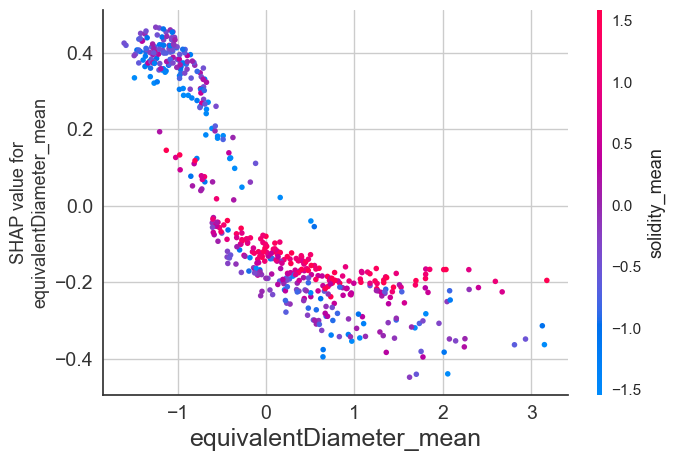

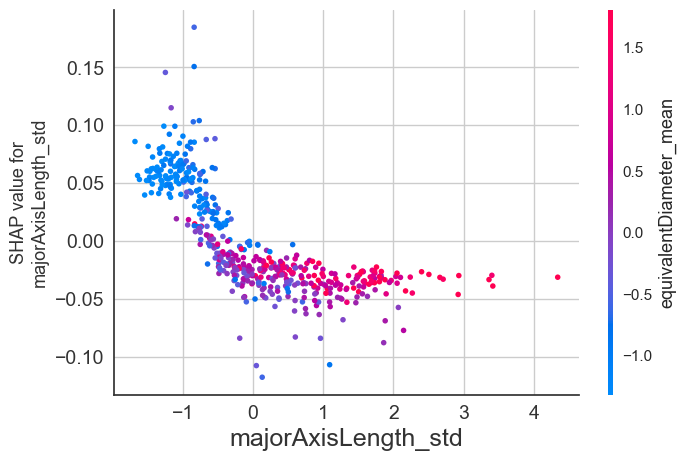

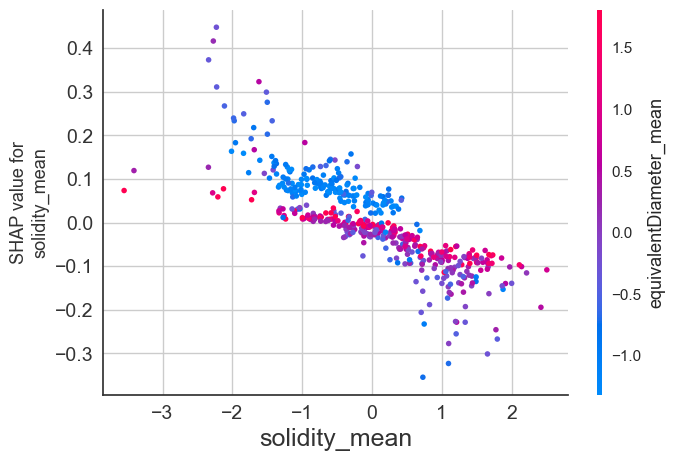

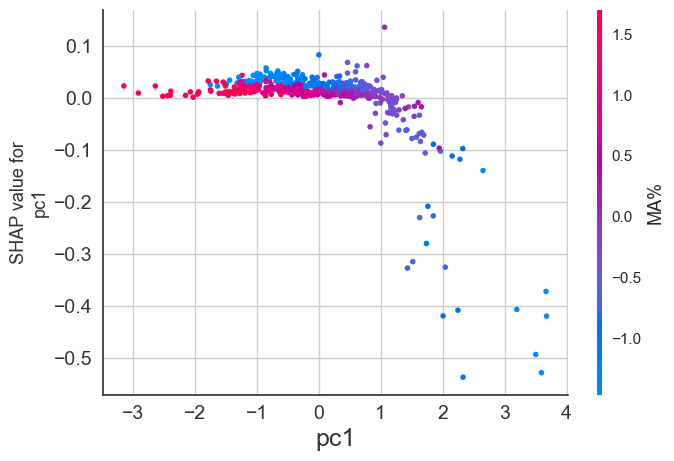

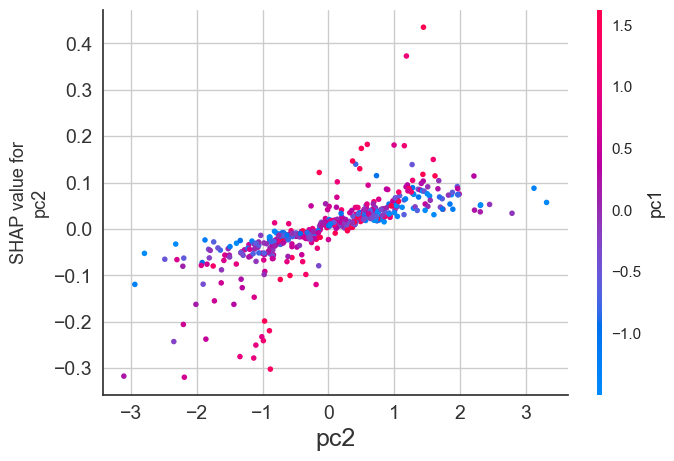

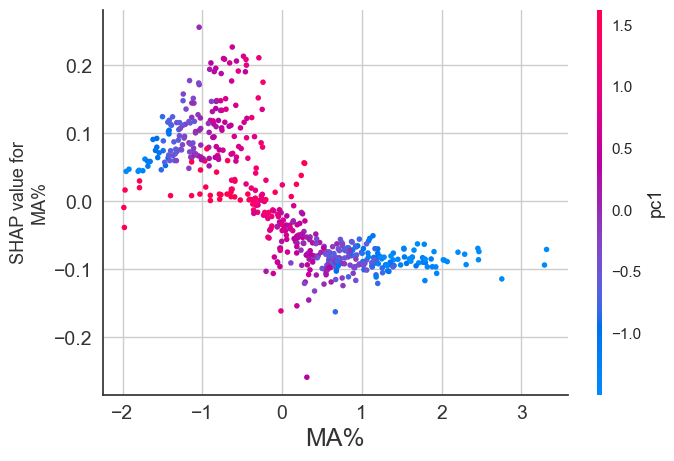

In [88]:
#plot dependence plots for a specific class

for name in X_train.columns:
    print(name)
    img = shap.dependence_plot(name, shap_values.values[:,:,current_label.value], X_train, display_features=X_train, show=False)
    plt.xlabel(name, fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig(name+'_lgbm_high.png') 
    

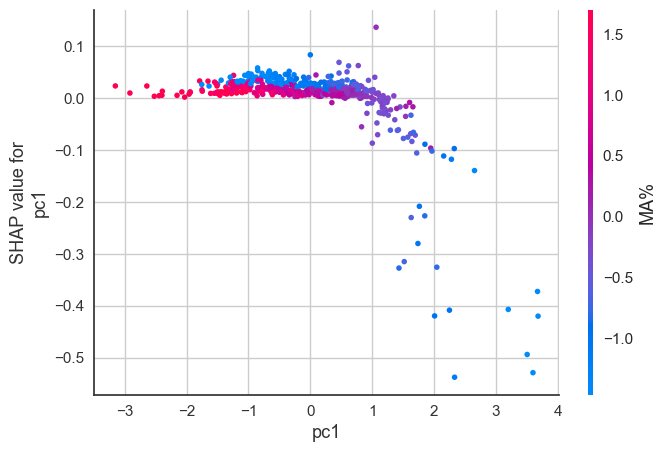

In [89]:
#plot a specific dependence plot

shap.dependence_plot("pc1", shap_values.values[:,:,current_label.value], X_train, display_features=X_train, show=False)

# Make predictions on test data

In [125]:
# ignoring polygon, box, boundingbox, p1 and p2 points
valid_cols = ["url", "area", "circumference", "aspectRatio", "shapeFactor", "compactness", "direction", "distance", "equivalentDiameter", "minorAxisLength", "majorAxisLength", "eccentricity", "convexArea", "solidity", "roundness","uniqueness"]

In [120]:
#get PCs from 2pt stats for testdataset 1 or 2
#TODO: change path of testdata files
#TODO: use "df_pca_testi" or "df_pca_testii" in df_test_pca for testdataset 1 or 2
df_pca_testi = pd.read_csv("./dataset_final/csvs_2pt_Marc_code/pca_2point_testset_i_256x.csv",
    usecols = ["url","pc1","pc2","MA%"],
    delimiter=",",
    decimal="."
)

df_pca_testii = pd.read_csv(
    "./dataset_final/csvs_2pt_Marc_code/pca_2point_testset_ii_256x.csv",
    usecols = ["url","pc1","pc2","MA%"],
    delimiter=",",
    decimal="."
)

df_test_pca = pd.concat([df_pca_testi])
df_test_pca.head()

,pc1,pc2,url,MA%
0,2.574917,-0.683886,i_ref_size10_400-H-6mm-4000x07_4_3.png,0.046726
1,-6.202168,0.786080,i_ref_size12_400_H-6mm-4000x11_3_3.png,0.022034
2,0.804961,-0.711241,i_ref_size10_400-H-6mm-4000x07_7_6.png,0.038620
3,-0.178180,-0.535442,i_ref_size11_400_H-9mm-4000x11_7_4.png,0.036007
4,6.034000,0.903778,i_ref_size10_400-H-6mm-4000x07_2_5.png,0.059898


In [126]:
#select "mask_polygons_images_semicoln_i_testset_256x_u.csv" 
#or "mask_polygons_images_semicoln_ii_testset_256x_u.csv" according to previous step

df_test = pd.read_csv(
    "./dataset_final/csvs_uniqueness/mask_polygons_images_semicoln_i_testset_256x_u.csv",
    usecols = valid_cols,
    delimiter=";",
    decimal="."
)
df_test.shape

(4731, 16)

In [127]:
#group by url to get mean and standard deviation

import numpy as np

df_test_grouped = df_test.groupby("url").agg([np.mean, np.std])
df_test_grouped.columns = df_test_grouped.columns.map("_".join)
df_test_grouped = df_test_grouped.reset_index()
df_test_grouped.head(-1)

,url,area_mean,area_std,circumference_mean,circumference_std,aspectRatio_mean,aspectRatio_std,shapeFactor_mean,shapeFactor_std,compactness_mean,...,eccentricity_mean,eccentricity_std,convexArea_mean,convexArea_std,solidity_mean,solidity_std,roundness_mean,roundness_std,uniqueness_mean,uniqueness_std
0,i_ref_size01_CFB9_400-6mm-4000x08_1_2.png,0.130594,NaN,3.138889,NaN,7.719298,NaN,2.450243,NaN,0.166564,...,0.129545,NaN,829.000000,NaN,0.816647,NaN,0.240814,NaN,0.637955,NaN
1,i_ref_size01_CFB9_400-6mm-4000x08_1_3.png,0.154128,NaN,3.138889,NaN,1.725264,NaN,2.255434,NaN,0.196580,...,0.579621,NaN,1389.000000,NaN,0.575234,NaN,0.379429,NaN,0.699359,NaN
2,i_ref_size01_CFB9_400-6mm-4000x08_2_1.png,0.146798,0.032616,3.398148,1.226738,5.958875,3.501544,2.533433,0.920539,0.200814,...,0.217038,0.133553,993.000000,190.506562,0.768033,0.102902,0.338899,0.204388,0.531498,0.190642
3,i_ref_size01_CFB9_400-6mm-4000x08_2_2.png,0.168403,NaN,3.472222,NaN,3.833333,NaN,2.386866,NaN,0.175527,...,0.260870,NaN,1238.000000,NaN,0.705170,NaN,0.354824,NaN,0.624960,NaN
4,i_ref_size01_CFB9_400-6mm-4000x08_2_3.png,0.125965,0.018551,2.638889,0.117851,3.524877,1.357163,2.102577,0.061446,0.226492,...,0.306410,0.117975,881.500000,124.450793,0.740461,0.004555,0.410692,0.081056,0.624286,0.007304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,i_ref_sizeCFB7_400-H-9mm-4000x12_8_1.png,0.166667,0.070664,2.611111,0.597061,3.282477,1.767993,1.845427,0.336664,0.312601,...,0.370871,0.170153,1068.125000,443.213902,0.810674,0.040730,0.489416,0.151228,0.651961,0.148010
1128,i_ref_sizeCFB7_400-H-9mm-4000x12_8_2.png,0.218667,0.060733,3.103175,0.678657,2.941059,1.422584,1.876683,0.290964,0.306560,...,0.431814,0.244590,1397.428571,414.831937,0.820299,0.072446,0.526784,0.169861,0.534932,0.092522
1129,i_ref_sizeCFB7_400-H-9mm-4000x12_8_3.png,0.306520,0.270241,4.041667,1.881665,4.549802,2.382048,2.156979,0.388895,0.232370,...,0.264485,0.109414,2045.916667,2045.712649,0.824595,0.065815,0.401702,0.122145,0.493078,0.092098
1130,i_ref_sizeCFB7_400-H-9mm-4000x12_8_4.png,0.266590,0.087508,3.816667,1.144903,3.354193,1.380811,2.077051,0.368109,0.256260,...,0.352757,0.167296,1889.600000,827.134088,0.764472,0.118240,0.463975,0.137454,0.587258,0.036845


In [128]:
#merge pca column and training set

df_testset = df_test_grouped.merge(df_test_pca, left_on='url', right_on='url')
df_testset

,url,area_mean,area_std,circumference_mean,circumference_std,aspectRatio_mean,aspectRatio_std,shapeFactor_mean,shapeFactor_std,compactness_mean,...,convexArea_std,solidity_mean,solidity_std,roundness_mean,roundness_std,uniqueness_mean,uniqueness_std,pc1,pc2,MA%
0,i_ref_size01_CFB9_400-6mm-4000x08_1_2.png,0.130594,NaN,3.138889,NaN,7.719298,NaN,2.450243,NaN,0.166564,...,NaN,0.816647,NaN,0.240814,NaN,0.637955,NaN,-9.306065,0.365280,0.008392
1,i_ref_size01_CFB9_400-6mm-4000x08_1_3.png,0.154128,NaN,3.138889,NaN,1.725264,NaN,2.255434,NaN,0.196580,...,NaN,0.575234,NaN,0.379429,NaN,0.699359,NaN,-9.006525,0.222801,0.009460
2,i_ref_size01_CFB9_400-6mm-4000x08_2_1.png,0.146798,0.032616,3.398148,1.226738,5.958875,3.501544,2.533433,0.920539,0.200814,...,190.506562,0.768033,0.102902,0.338899,0.204388,0.531498,0.190642,-5.454402,-0.312367,0.018497
3,i_ref_size01_CFB9_400-6mm-4000x08_2_2.png,0.168403,NaN,3.472222,NaN,3.833333,NaN,2.386866,NaN,0.175527,...,NaN,0.705170,NaN,0.354824,NaN,0.624960,NaN,-9.796537,0.293277,0.007481
4,i_ref_size01_CFB9_400-6mm-4000x08_2_3.png,0.125965,0.018551,2.638889,0.117851,3.524877,1.357163,2.102577,0.061446,0.226492,...,124.450793,0.740461,0.004555,0.410692,0.081056,0.624286,0.007304,-7.610310,0.084527,0.012787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,i_ref_sizeCFB7_400-H-9mm-4000x12_8_2.png,0.218667,0.060733,3.103175,0.678657,2.941059,1.422584,1.876683,0.290964,0.306560,...,414.831937,0.820299,0.072446,0.526784,0.169861,0.534932,0.092522,0.083509,-0.681583,0.035316
1129,i_ref_sizeCFB7_400-H-9mm-4000x12_8_3.png,0.306520,0.270241,4.041667,1.881665,4.549802,2.382048,2.156979,0.388895,0.232370,...,2045.712649,0.824595,0.065815,0.401702,0.122145,0.493078,0.092098,3.905446,-1.353503,0.047337
1130,i_ref_sizeCFB7_400-H-9mm-4000x12_8_4.png,0.266590,0.087508,3.816667,1.144903,3.354193,1.380811,2.077051,0.368109,0.256260,...,827.134088,0.764472,0.118240,0.463975,0.137454,0.587258,0.036845,-0.526410,-0.912173,0.033871
1131,i_ref_sizeCFB7_400-H-9mm-4000x12_8_5.png,0.218634,0.148251,3.794444,2.086627,3.636626,1.943294,2.266592,0.628076,0.229620,...,2258.058696,0.682779,0.183486,0.398701,0.188472,0.565393,0.126937,-0.060475,-0.880529,0.033142


In [129]:
#make predictions on testset using trained models, e.g LGBM

predictions = predict_model(lightgbm, data=df_testset)
predictions.head()

,equivalentDiameter_mean,majorAxisLength_std,solidity_mean,pc1,pc2,MA%,prediction_label,prediction_score
0,-1.368316,0.051965,0.385724,-2.317905,0.554215,-2.626139,high,0.9585
1,-1.230168,0.051965,-6.479230,-2.240591,0.355059,-2.614511,high,0.9983
2,-1.279119,-1.476206,-0.996677,-1.323753,-0.392996,-2.516133,high,0.9998
3,-1.151485,0.051965,-2.784302,-2.444500,0.453571,-2.636064,high,0.9985
4,-1.399059,-2.126733,-1.780730,-1.880214,0.161781,-2.578300,high,0.9997


In [130]:
#get some stats

predictions['prediction_label'].value_counts()

high      785
medium    341
low         7
Name: prediction_label, dtype: int64

In [131]:
#control if number of predictions equal number of rows in testset

len(predictions)==len(df_testset)

True

In [ ]:
#save predictions into a CSV file

import os  
os.makedirs('csv', exist_ok=True)  
predictions.to_csv('csv/predictions_testset_i_256x_lightgbm.csv')  

## Heat map to track multicollinearity

Code after [drazenz](https://pypi.org/project/heatmapz/)

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 500)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=500, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )

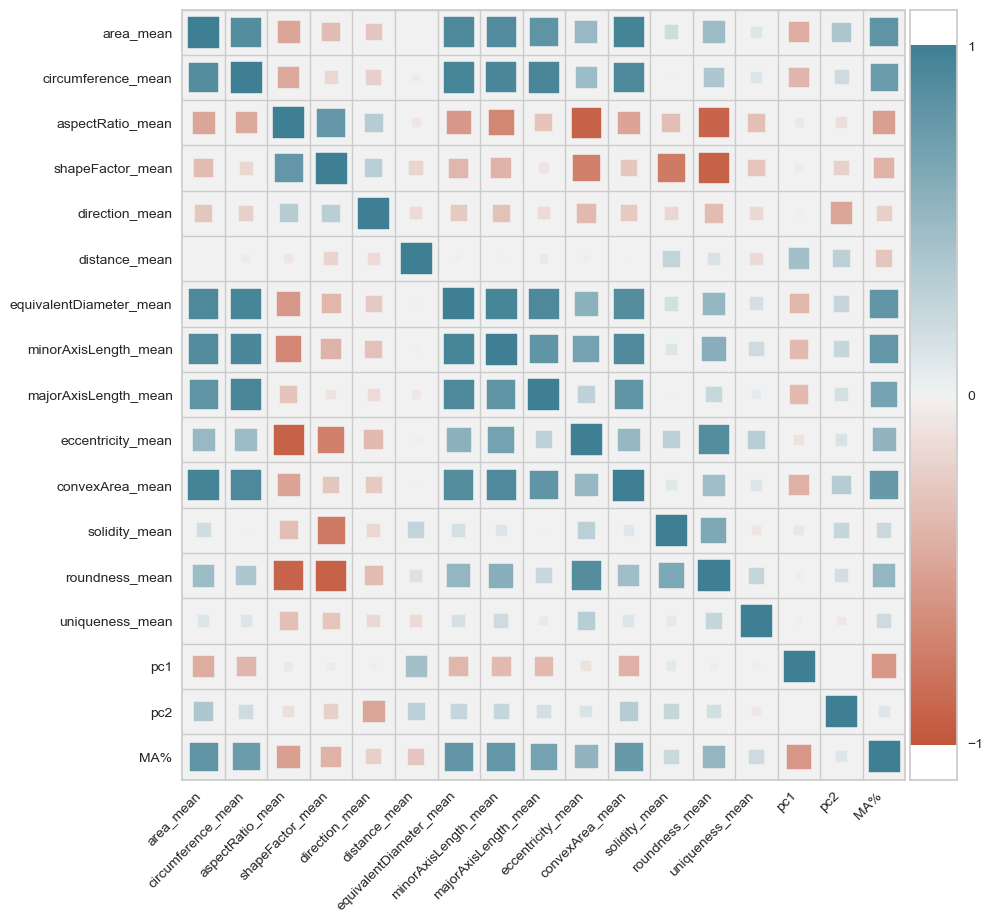

In [93]:
#plot the correlation plot

corr = df_trainset.drop(['url', 'CIV','area_std','circumference_std','aspectRatio_std','shapeFactor_std','distance_std','direction_std','minorAxisLength_std','majorAxisLength_std','eccentricity_std','convexArea_std','solidity_std','roundness_std','uniqueness_std','equivalentDiameter_std'], axis=1).corr()
plt.figure(figsize=(10, 10))
corrplot(corr)

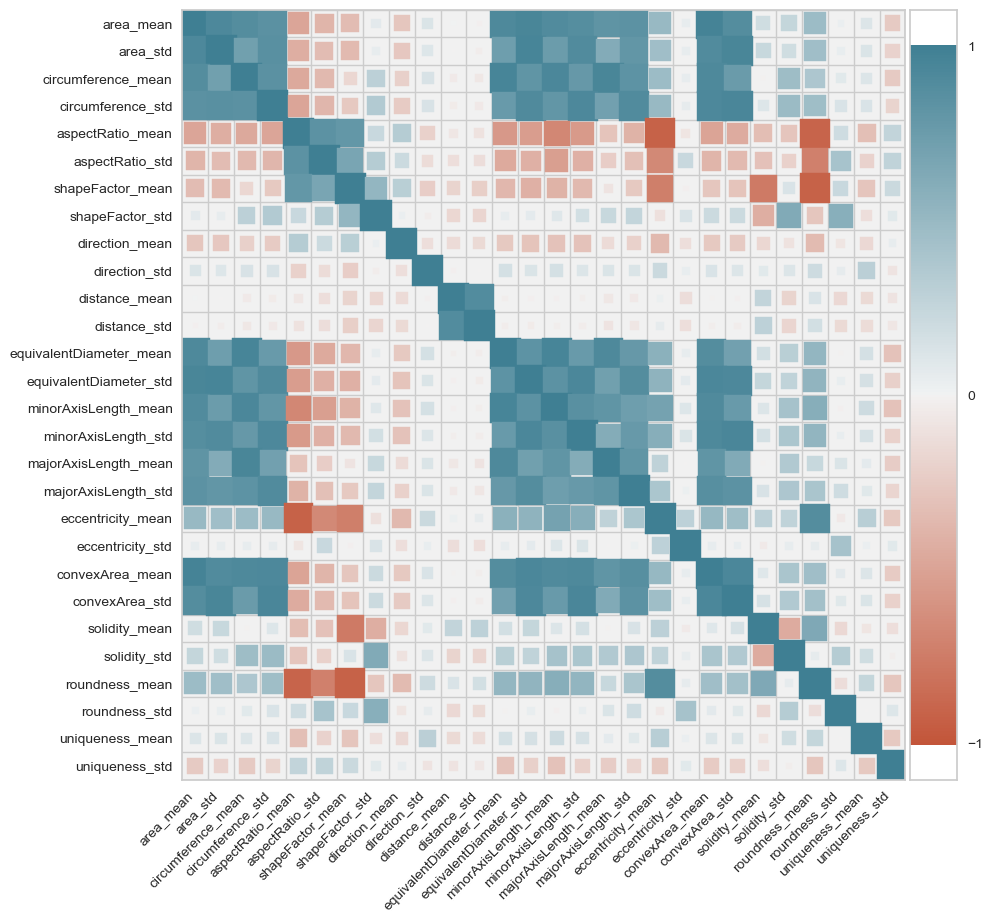

In [97]:
corr = df_train_grouped.drop(['url'], axis=1).corr()
plt.figure(figsize=(10, 10))
corrplot(corr)

In [98]:
df = pd.DataFrame(df_train)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,area,circumference,aspectRatio,shapeFactor,direction,distance,equivalentDiameter,minorAxisLength,majorAxisLength,eccentricity,convexArea,solidity,roundness,uniqueness
area,1.000000,0.888066,-0.129742,0.255218,-0.024928,-0.079622,0.918774,0.894154,0.819133,0.138348,0.968994,-0.313808,-0.062031,0.065005
circumference,0.888066,1.000000,-0.030008,0.515523,0.019432,-0.110504,0.952815,0.918776,0.949233,0.051596,0.917136,-0.553530,-0.260093,0.098425
aspectRatio,-0.129742,-0.030008,1.000000,0.636095,0.163291,0.009890,-0.144046,-0.295690,0.127842,-0.801489,-0.124408,-0.123587,-0.763580,-0.222062
shapeFactor,0.255218,0.515523,0.636095,1.000000,0.174603,-0.085508,0.330996,0.272042,0.560333,-0.510251,0.319172,-0.774244,-0.868268,-0.080809
direction,-0.024928,0.019432,0.163291,0.174603,1.000000,-0.053145,-0.009103,-0.036068,0.047131,-0.183303,-0.017473,-0.105876,-0.176522,-0.051011
distance,-0.079622,-0.110504,0.009890,-0.085508,-0.053145,1.000000,-0.102976,-0.099663,-0.109010,-0.012844,-0.083425,0.114027,0.039059,-0.024209
equivalentDiameter,0.918774,0.952815,-0.144046,0.330996,-0.009103,-0.102976,1.000000,0.946703,0.920931,0.146793,0.890239,-0.420433,-0.108112,0.135205
minorAxisLength,0.894154,0.918776,-0.295690,0.272042,-0.036068,-0.099663,0.946703,1.000000,0.803913,0.334423,0.900829,-0.446364,-0.006248,0.154694
majorAxisLength,0.819133,0.949233,0.127842,0.560333,0.047131,-0.109010,0.920931,0.803913,1.000000,-0.127425,0.823159,-0.542744,-0.381579,0.079910
eccentricity,0.138348,0.051596,-0.801489,-0.510251,-0.183303,-0.012844,0.146793,0.334423,-0.127425,1.000000,0.131961,0.128202,0.757481,0.186837


In [99]:
df = pd.DataFrame(df_train_grouped)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,area_mean,area_std,circumference_mean,circumference_std,aspectRatio_mean,aspectRatio_std,shapeFactor_mean,shapeFactor_std,direction_mean,direction_std,distance_mean,distance_std,equivalentDiameter_mean,equivalentDiameter_std,minorAxisLength_mean,minorAxisLength_std,majorAxisLength_mean,majorAxisLength_std,eccentricity_mean,eccentricity_std,convexArea_mean,convexArea_std,solidity_mean,solidity_std,roundness_mean,roundness_std,uniqueness_mean,uniqueness_std
area_mean,1.000000,0.927488,0.889163,0.850722,-0.487824,-0.385054,-0.340165,0.076123,-0.273709,0.127418,0.007413,-0.018536,0.917283,0.945432,0.902343,0.880102,0.821446,0.838146,0.505257,0.058385,0.969839,0.883105,0.190222,0.253340,0.481279,0.035343,0.118309,-0.248121
area_std,0.927488,1.000000,0.720074,0.858795,-0.433142,-0.335148,-0.350178,0.054274,-0.266884,0.106847,-0.001909,-0.028753,0.737181,0.958268,0.754370,0.905009,0.618731,0.806872,0.452700,0.052096,0.903985,0.948920,0.231434,0.191728,0.458619,0.049687,0.128087,-0.198492
circumference_mean,0.889163,0.720074,1.000000,0.850626,-0.459368,-0.357120,-0.166251,0.294690,-0.213119,0.144355,-0.049857,-0.062491,0.953878,0.814075,0.931287,0.784485,0.945108,0.831999,0.474596,0.056581,0.918104,0.761152,-0.004881,0.470036,0.383242,0.088960,0.120997,-0.251431
circumference_std,0.850722,0.858795,0.850626,1.000000,-0.487470,-0.375138,-0.260294,0.351734,-0.241215,0.137750,-0.038513,-0.051345,0.764793,0.913439,0.810419,0.921674,0.712161,0.903270,0.501118,0.061464,0.922288,0.941820,0.106934,0.482987,0.459460,0.131557,0.131044,-0.190525
aspectRatio_mean,-0.487824,-0.433142,-0.459368,-0.487470,1.000000,0.841992,0.803264,0.229546,0.337029,-0.206560,-0.071880,-0.096457,-0.564345,-0.531759,-0.670619,-0.553590,-0.289596,-0.400238,-0.916032,-0.077040,-0.490556,-0.447214,-0.330822,-0.280840,-0.900101,0.198677,-0.319795,0.270222
aspectRatio_std,-0.385054,-0.335148,-0.357120,-0.375138,0.841992,1.000000,0.675413,0.334394,0.214103,-0.131387,-0.114106,-0.126653,-0.451451,-0.412445,-0.523162,-0.412883,-0.230976,-0.310958,-0.663245,0.225045,-0.388210,-0.349495,-0.304451,-0.200976,-0.722892,0.419404,-0.197188,0.271796
shapeFactor_mean,-0.340165,-0.350178,-0.166251,-0.260294,0.803264,0.675413,1.000000,0.526732,0.311708,-0.224463,-0.184871,-0.220282,-0.366938,-0.413128,-0.400826,-0.362230,-0.083844,-0.258393,-0.725657,-0.019575,-0.276893,-0.292045,-0.758633,0.136005,-0.917871,0.223794,-0.279011,0.220642
shapeFactor_std,0.076123,0.054274,0.294690,0.351734,0.229546,0.334394,0.526732,1.000000,0.035775,-0.028785,-0.167330,-0.178186,0.058667,0.072795,0.104533,0.173347,0.232434,0.256799,-0.112759,0.132994,0.213648,0.215485,-0.432369,0.626471,-0.278266,0.586177,-0.117807,0.088414
direction_mean,-0.273709,-0.266884,-0.213119,-0.241215,0.337029,0.214103,0.311708,0.035775,1.000000,-0.118209,-0.144352,-0.150448,-0.257206,-0.292299,-0.298431,-0.294551,-0.140469,-0.201419,-0.362935,-0.113772,-0.262606,-0.250216,-0.164638,-0.091365,-0.345247,-0.074789,-0.153116,0.054741
direction_std,0.127418,0.106847,0.144355,0.137750,-0.206560,-0.131387,-0.224463,-0.028785,-0.118209,1.000000,-0.014269,0.000716,0.162395,0.127488,0.166949,0.113892,0.121662,0.123148,0.216984,0.049175,0.130774,0.114645,0.085593,0.120985,0.205603,0.059984,0.301996,-0.082482
